In [ ]:
# wave 곡선을 예측해 보자.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

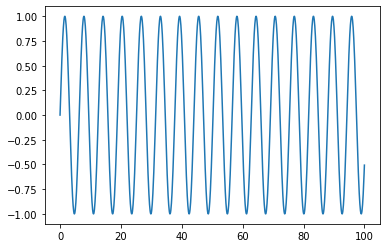

In [ ]:
x = np.linspace(0, 100, 1001)
x = np.round(x,1) # 소수점 첫째 자리 기준으로 반올림 추후에 학습시 문제 발생
y = np.sin(x)
plt.plot(x,y)

In [ ]:
df = pd.DataFrame(data = y, index = x, columns = ["sine_wave"])

In [ ]:
# Train, Test 분리
train = df.iloc[:801]
test = df.iloc[801:]

In [ ]:
train.tail()

,sine_wave
79.6,-0.872445
79.7,-0.916876
79.8,-0.952146
79.9,-0.977903
80.0,-0.993889


In [ ]:
test.head()

,sine_wave
80.1,-0.999944
80.2,-0.996008
80.3,-0.982120
80.4,-0.958419
80.5,-0.925142


In [ ]:
test.tail()

,sine_wave
99.6,-0.802196
99.7,-0.738582
99.8,-0.667588
99.9,-0.589924
100.0,-0.506366


In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
arr_1 = np.array([1,2,3,4,5])
generator = TimeseriesGenerator(arr_1, arr_1, length =2, batch_size = 1)
generator[0], generator[1], generator[2]

((array([[1, 2]]), array([3])),
 (array([[2, 3]]), array([4])),
 (array([[3, 4]]), array([5])))

In [ ]:
length = 50
train_1 = np.array(train).reshape(801,)
generator = TimeseriesGenerator(train_1, train_1, length =length, batch_size = 1)
# train data를 이용해서 target data가 train 인 data를 생성한다. 

In [ ]:
generator[0][0].shape

(1, 50)

In [ ]:
generator[1][0]

array([[ 0.09983342,  0.19866933,  0.29552021,  0.38941834,  0.47942554,
         0.56464247,  0.64421769,  0.71735609,  0.78332691,  0.84147098,
         0.89120736,  0.93203909,  0.96355819,  0.98544973,  0.99749499,
         0.9995736 ,  0.99166481,  0.97384763,  0.94630009,  0.90929743,
         0.86320937,  0.8084964 ,  0.74570521,  0.67546318,  0.59847214,
         0.51550137,  0.42737988,  0.33498815,  0.23924933,  0.14112001,
         0.04158066, -0.05837414, -0.15774569, -0.2555411 , -0.35078323,
        -0.44252044, -0.52983614, -0.61185789, -0.68776616, -0.7568025 ,
        -0.81827711, -0.87157577, -0.91616594, -0.95160207, -0.97753012,
        -0.993691  , -0.99992326, -0.99616461, -0.98245261, -0.95892427]])

In [ ]:
import tensorflow as tf
# https://www.tensorflow.org/guide/keras/rnn?hl=ko
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.SimpleRNN(50, activation="tanh", input_shape=(50,1)))
model.add(tf.keras.layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam", loss = "mse")
model.fit(generator, epochs=5)

Epoch 1/5
751/751 [==============================] - 16s 18ms/step - loss: 0.0094
Epoch 2/5
751/751 [==============================] - 9s 12ms/step - loss: 2.8870e-04
Epoch 3/5
751/751 [==============================] - 6s 7ms/step - loss: 4.4529e-04
Epoch 4/5
751/751 [==============================] - 6s 7ms/step - loss: 2.7943e-05
Epoch 5/5
751/751 [==============================] - 7s 9ms/step - loss: 2.2085e-04


In [ ]:
# predict 
length = 50
test_1 = np.array(test).reshape(200,)
generator_test = TimeseriesGenerator(test_1, test_1, length =length, batch_size = 1)

In [ ]:
generator_test[0], generator_test[149], 

((array([[-0.99994369, -0.99600761, -0.98211976, -0.95841889, -0.92514181,
          -0.88262103, -0.83128139, -0.77163586, -0.70428039, -0.62988799,
          -0.54920196, -0.46302849, -0.37222858, -0.27770949, -0.18041562,
          -0.0813191 ,  0.01858994,  0.11831323,  0.21685437,  0.31322878,
           0.40647351,  0.49565689,  0.57988783,  0.65832473,  0.73018386,
           0.79474723,  0.85136976,  0.89948568,  0.93861423,  0.96836446,
           0.98843911,  0.99863761,  0.99885805,  0.98909823,  0.96945567,
           0.94012663,  0.90140415,  0.85367514,  0.79741649,  0.73319032,
           0.66163835,  0.58347552,  0.49948278,  0.41049938,  0.31741441,
           0.22115794,  0.12269172,  0.02299962, -0.07692229, -0.17607562]]),
  array([-0.27346966])),
 (array([[ 0.68326171,  0.75274397,  0.81470506,  0.86852589,  0.91366869,
           0.94968242,  0.97620723,  0.99297811,  0.99982747,  0.99668689,
           0.98358775,  0.96066092,  0.92813548,  0.88633642,  0.8356813

In [ ]:
predict_test = model.predict(generator_test)

150/150 [==============================] - 1s 3ms/step


In [ ]:
predict_test.shape

(150, 1)

In [ ]:
test

,sine_wave
80.1,-0.999944
80.2,-0.996008
80.3,-0.982120
80.4,-0.958419
80.5,-0.925142
...,...
99.6,-0.802196
99.7,-0.738582
99.8,-0.667588
99.9,-0.589924


In [ ]:
test_2 = test.drop(test.index[0:length])

In [ ]:
test_2["predict_test_simplernn"] = predict_test

In [ ]:
test_2

,sine_wave,predict_test_simplernn
85.1,-0.273470,-0.269469
85.2,-0.368131,-0.362321
85.3,-0.459115,-0.451680
85.4,-0.545511,-0.536981
85.5,-0.626456,-0.617566
...,...,...
99.6,-0.802196,-0.797611
99.7,-0.738582,-0.735157
99.8,-0.667588,-0.665373
99.9,-0.589924,-0.588757


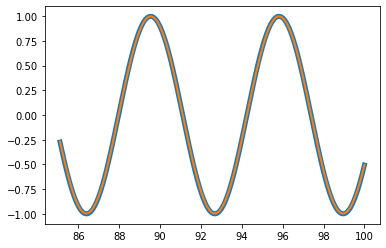

In [ ]:
plt.plot(test_2.index, test_2.sine_wave, linewidth = 5.0) # true 
plt.plot(test_2.index, test_2.predict_test_simplernn, linewidth = 2.0)# predict

In [ ]:
# 1. sin 말고 cos 
# 2. test case 를 85 ~ 100 -> 100.1 ~ 150??? 
# 100.0 예측 : 95.0 ~ 99.9 -> 100.0
# 100.1 예측 : 95.1 ~ 100.0 -> 100.1 (# 100.0 을 append 해주자 )
# 100.2 예측 : 95.2 ~ 100.1 -> 100.2 (# 100.1 을 append 해주자 )
# ...
# 105.0 예측 : 100.0 ~ 104.9 -> 105.0 (# 문제발생.... 원래 데이터로 예측한 데이터가 아니다. ) 

In [ ]:
length

50

In [ ]:
generator_test[-51][0]

array([[ 0.68326171,  0.75274397,  0.81470506,  0.86852589,  0.91366869,
         0.94968242,  0.97620723,  0.99297811,  0.99982747,  0.99668689,
         0.98358775,  0.96066092,  0.92813548,  0.88633642,  0.83568138,
         0.77667649,  0.7099113 ,  0.63605292,  0.5558393 ,  0.47007192,
         0.37960774,  0.28535064,  0.18824242,  0.08925333, -0.01062754,
        -0.11040222, -0.20907381, -0.30565639, -0.39918496, -0.48872501,
        -0.57338187, -0.6523097 , -0.72471986, -0.78988886, -0.84716555,
        -0.89597764, -0.93583742, -0.96634662, -0.98720041, -0.99819042,
        -0.99920683, -0.99023951, -0.97137803, -0.94281087, -0.90482346,
        -0.85779535, -0.80219643, -0.73858223, -0.66758835, -0.58992416]])

In [ ]:
model.predict(generator_test[-51][0])[0]

1/1 [==============================] - 0s 34ms/step


array([-0.5059352], dtype=float32)

In [ ]:
generator_test[-51][0][:,1:]

array([[ 0.75274397,  0.81470506,  0.86852589,  0.91366869,  0.94968242,
         0.97620723,  0.99297811,  0.99982747,  0.99668689,  0.98358775,
         0.96066092,  0.92813548,  0.88633642,  0.83568138,  0.77667649,
         0.7099113 ,  0.63605292,  0.5558393 ,  0.47007192,  0.37960774,
         0.28535064,  0.18824242,  0.08925333, -0.01062754, -0.11040222,
        -0.20907381, -0.30565639, -0.39918496, -0.48872501, -0.57338187,
        -0.6523097 , -0.72471986, -0.78988886, -0.84716555, -0.89597764,
        -0.93583742, -0.96634662, -0.98720041, -0.99819042, -0.99920683,
        -0.99023951, -0.97137803, -0.94281087, -0.90482346, -0.85779535,
        -0.80219643, -0.73858223, -0.66758835, -0.58992416]])

In [ ]:
np.append(generator_test[-51][0][:,1:], model.predict(generator_test[-51][0]), axis = 1)

1/1 [==============================] - 0s 47ms/step


array([[ 0.75274397,  0.81470506,  0.86852589,  0.91366869,  0.94968242,
         0.97620723,  0.99297811,  0.99982747,  0.99668689,  0.98358775,
         0.96066092,  0.92813548,  0.88633642,  0.83568138,  0.77667649,
         0.7099113 ,  0.63605292,  0.5558393 ,  0.47007192,  0.37960774,
         0.28535064,  0.18824242,  0.08925333, -0.01062754, -0.11040222,
        -0.20907381, -0.30565639, -0.39918496, -0.48872501, -0.57338187,
        -0.6523097 , -0.72471986, -0.78988886, -0.84716555, -0.89597764,
        -0.93583742, -0.96634662, -0.98720041, -0.99819042, -0.99920683,
        -0.99023951, -0.97137803, -0.94281087, -0.90482346, -0.85779535,
        -0.80219643, -0.73858223, -0.66758835, -0.58992416, -0.50593519]])

In [ ]:
forecast = [] # 예측한 값만 넣어두는 list
current_batch = generator_test[-51][0] # 초기 예측하기위해 사용(100을 예측) + 원래 만들어진 데이터 (예측x)
for i in range(200):
  currend_predict = model.predict(current_batch)[0]
  forecast.append(currend_predict) # 예측한 값들만 저장
  current_batch = np.append(current_batch[:,1:], currend_predict).reshape(1,50)

1/1 [==============================] - 0s 27ms/step


In [ ]:
forecast_index = np.arange(100, 119.9, step = 0.1)

In [ ]:
len(forecast_index), len(forecast)

(200, 200)

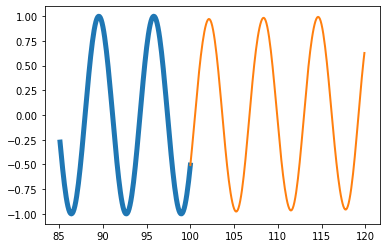

In [ ]:
plt.plot(test_2.index, test_2.sine_wave, linewidth = 5.0) # true 
plt.plot(forecast_index, forecast, linewidth = 2.0)# predict

In [ ]:
forecast

[array([-0.5059352], dtype=float32),
 array([-0.41757017], dtype=float32),
 array([-0.34734565], dtype=float32),
 array([-0.30693638], dtype=float32),
 array([-0.31117445], dtype=float32),
 array([-0.3442669], dtype=float32),
 array([-0.39846456], dtype=float32),
 array([-0.4523577], dtype=float32),
 array([-0.45849508], dtype=float32),
 array([-0.4621895], dtype=float32),
 array([-0.45394838], dtype=float32),
 array([-0.43735188], dtype=float32),
 array([-0.41353196], dtype=float32),
 array([-0.40465367], dtype=float32),
 array([-0.3854838], dtype=float32),
 array([-0.37321508], dtype=float32),
 array([-0.36663133], dtype=float32),
 array([-0.36856198], dtype=float32),
 array([-0.38218558], dtype=float32),
 array([-0.39860952], dtype=float32),
 array([-0.41164005], dtype=float32),
 array([-0.4198584], dtype=float32),
 array([-0.4377067], dtype=float32),
 array([-0.4557106], dtype=float32),
 array([-0.46852624], dtype=float32),
 array([-0.47838897], dtype=float32),
 array([-0.4823329],

In [ ]:
#LSTM

In [ ]:
model_lstm = tf.keras.models.Sequential()
model_lstm.add(tf.keras.layers.LSTM(50, activation="tanh", input_shape=(50,1)))
model_lstm.add(tf.keras.layers.Dense(1))

In [ ]:
model_lstm.compile(optimizer="adam", loss = "mse")
model_lstm.fit(generator, epochs=5)

Epoch 1/5
751/751 [==============================] - 18s 22ms/step - loss: 0.0236
Epoch 2/5
751/751 [==============================] - 14s 18ms/step - loss: 1.0172e-04
Epoch 3/5
751/751 [==============================] - 13s 17ms/step - loss: 7.3856e-04
Epoch 4/5
751/751 [==============================] - 13s 17ms/step - loss: 2.0697e-05
Epoch 5/5
751/751 [==============================] - 13s 17ms/step - loss: 5.5781e-04


1/1 [==============================] - 0s 22ms/step


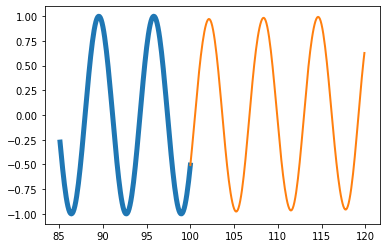

In [ ]:
forecast = [] # 예측한 값만 넣어두는 list
current_batch = generator_test[-51][0] # 초기 예측하기위해 사용(100을 예측) + 원래 만들어진 데이터 (예측x)
for i in range(200):
  currend_predict = model.predict(current_batch)[0]
  forecast.append(currend_predict) # 예측한 값들만 저장
  current_batch = np.append(current_batch[:,1:], currend_predict).reshape(1,50)
plt.plot(test_2.index, test_2.sine_wave, linewidth = 5.0) # true 
plt.plot(forecast_index, forecast, linewidth = 2.0)# predict